In [1]:
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.utils import to_categorical
from typing import Dict, List, Tuple
from random import random
import matplotlib.pyplot as plt
from matplotlib import gridspec
import numpy as np

In [2]:
## Classification of the flower. 
iris_df = pd.read_csv('./iris_dataset.csv')

In [3]:
iris_df = iris_df.sample(frac = 1)

,sepal_length,sepal_width,petal_length,petal_width,label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


We'll split the dataset into training and testing dataset, use the training dataset to train the model and testing model to evaluate the model performance in the unseen data. 

In [3]:
# shuffle the dataframe. 
iris_df = iris_df.sample(frac = 1)
#  we can see that the whole dataset has been shuffled row-wsie. 
iris_df

,sepal_length,sepal_width,petal_length,petal_width,label
13,4.3,3.0,1.1,0.1,0
127,6.1,3.0,4.9,1.8,2
55,5.7,2.8,4.5,1.3,1
146,6.3,2.5,5.0,1.9,2
8,4.4,2.9,1.4,0.2,0
...,...,...,...,...,...
19,5.1,3.8,1.5,0.3,0
43,5.0,3.5,1.6,0.6,0
106,4.9,2.5,4.5,1.7,2
48,5.3,3.7,1.5,0.2,0


In [7]:
train_df = iris_df.iloc[0:100]
test_df = iris_df.iloc[100:150]

In [11]:
x = train_df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
y = train_df[['label']]

In [20]:
complete_x = np.append(x, np.ones([x.shape[0], 1]), 1)  # adding one colum of ones. 
def linear_model(w: np.array):
    return np.matmul(complete_x, w)

# loss function is the root mean square error. 
def loss(y_pred: np.ndarray):
    return np.mean((y_pred - y)**2)

# gradient calculation. 
def gradient(w):
    return 1/2 * np.matmul(complete_x.T, np.matmul(complete_x, w) - y)

In [21]:
w = np.random.normal(0, 1, size = (x.shape[1] + 1))

In [22]:
w

array([-0.0463536 ,  0.51036525,  1.90560766,  0.44298781,  1.75816013])

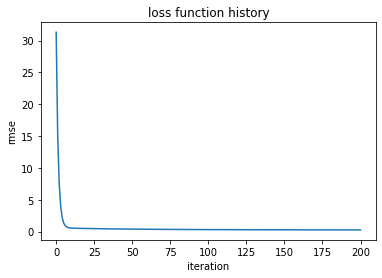

predicted value
[ 1. -0.  0.  1. -0.  1.  3.  0.  0.  1.  1.  1. -0.  2. -0.  0. -0.  2.
 -1. -1.  3. -0.  1.  0.  1.  1. -0.  1. -0. -0.  2.  1.  1.  0.  2.  2.
  0.  2.  0.  3.  2.  2. -0.  0.  1.  1.  2.  2.  2.  1.  2.  1. -0.  1.
  1.  1.  1.  0.  2.  1.  1.  1. -0.  2.  1.  1.  2.  1.  1.  1.  2. -0.
  2. -0.  2.  1. -0. -0. -0.  2.  1. -1.  1.  2.  1.  0.  0.  2.  2.  1.
 -0.  2. -0.  2.  2.  1.  1.  1.  1.  1.]
true label
[2 0 1 1 0 1 2 0 0 2 1 1 0 2 0 0 0 1 0 0 2 0 1 0 1 1 0 1 0 0 2 1 2 0 1 1 0
 2 1 2 2 2 0 0 2 1 1 1 1 1 1 1 0 2 1 1 1 0 1 1 1 2 0 2 1 1 1 1 1 1 2 0 2 0
 2 1 0 0 0 2 2 0 2 1 1 0 0 2 2 1 0 1 0 1 2 1 2 2 1 2]
training accuracy
0.69


In [31]:
# we'll use first 100 rows for training and remaining 50 rows for testing. 
train_df = iris_df.iloc[0:100]
test_df = iris_df.iloc[100:150]

def train_lr_model(x: np.ndarray, y: np.ndarray):
    """
    Construct the linear model, weights and bias. 
    Loss function. 
    Gradient calculation. 
    """    
    complete_x = np.append(x, np.ones([x.shape[0], 1]), 1)  # adding one colum of ones. 
    
    def linear_model(w: np.array):
        return np.matmul(complete_x, w)
    
    # loss function is the root mean square error. 
    def loss(y_pred: np.ndarray):
        return np.mean((y_pred - y)**2)
    
    # gradient calculation. 
    def gradient(w):
        return 1/2 * np.matmul(complete_x.T, np.matmul(complete_x, w) - y)
    
    # initialize the model parameters. 
    w = np.random.normal(0, 1, size = (x.shape[1] + 1))
    ith_run = 0
    loss_hist = []
    
    temp_ls = loss(linear_model(w))
    
    # Our training will stop when the epoch reachs its maximum iteration or the loss is less than 
    # a predetermined threshold value. 
    while (ith_run <= global_df['epoch'] and temp_ls >= global_df['termi_threshold']):
        temp_pred = linear_model(w)
        temp_gradient = gradient(w) # Shape: (5, )
        
        w -= global_df['learning_rate'] * temp_gradient        
        ith_run += 1
        temp_ls = loss(linear_model(w))
        loss_hist.append(temp_ls)      
    
    return loss_hist, w, temp_pred


global_df = {'learning_rate': .0001, 
            'epoch': 200, 
            'termi_threshold': .00000001}


ls_hist_clsf, w_clsf, pred_clsf = train_lr_model(train_df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']].values, 
                                                train_df.label.values)


plt.plot(ls_hist_clsf)
plt.title('loss function history')
plt.xlabel('iteration')
plt.ylabel('rmse')
plt.show()

# now print out the how accurately the model performs. 
print ('predicted value')
print (np.round(pred_clsf))

# print out the true label of the training data. 
print ('true label')
print (train_df.label.values)

# evaluate the training accuracy. 
# in training data. 
print ('training accuracy')
print (np.sum([np.round(pred_clsf[i]) == train_df.label.values[i] for i in range(len(pred_clsf))]) / 100)

In [32]:
# evaluate the model testing performance.
def eval_model(x: np.ndarray, y: np.ndarray, w: np.ndarray):
    """
    evaluate the testing performance. 
    """
    complete_x = np.append(x, np.ones([x.shape[0], 1]), 1)
    def linear_model(w: np.array):
        return np.matmul(complete_x, w)
    pred = linear_model(w)
    
    print ('the testing accuracy is: ')
    acc = np.sum([np.round(pred[i]) == y[i] for i in range(len(y))]) / len(y)
    print (acc)

eval_model(x = test_df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']].values, 
          y = test_df.label.values, 
          w = w_clsf)

the testing accuracy is: 
0.48


If we run that model multiple times, we can find that the model performance is very unstable. Sometimes it reaches almost 100% accurate, sometimes it is not. The gradient descent method is not powerful enough to gurantee to find that optimal model parameters every time. This is likely becaues: 
- the model architecture is very sensitive to the initialization.  
- This sensitivity imposes challenged to the gradient descent method.
- Our loss function (RMSE) allows the numeric values instead of the categorical values

What we would like to obtain is that a model achieves satisfactory performance without much cross-training unstability. Every time we train a model given a new initialization, it can at least perform more stable than this linear model. 

### Artificial neural network

Now let's build our first ANNs to achieve the same classification task. Instead of building the model from scratch for the linear model, we'll use the keras and tensorflow packages we installed last time for a fast implementation. 

First, we'll spit the data into training and testing data set. We'll write a function to do it. Later we could quickly adjust the splitting ratio to redefine the dataset. This function takes two argumetns, one is the split ratio (the portion of the dataset to be defined as the training data), the other is the whole dataset on which this splitting operation performs. 

In [33]:
def split_train_test(ratio: int, df: pd.DataFrame, shuffle: bool) -> Tuple[pd.DataFrame, pd.DataFrame]:
    """
    This function will split the data into training and testing sets. 
    The ratio of this train/test split is the input argument.
    """
    train_rows = int(df.shape[0] * ratio)
    test_rows = df.shape[0] - train_rows
    
    # shuffle the data frame completely. 
    if shuffle:
        df = df.sample(frac = 1)
    
    return df.iloc[0:train_rows], df.iloc[train_rows:(train_rows + test_rows)]

trn, tst = split_train_test(.8, iris_df, True)

In [36]:
tst.shape

(30, 5)

In [37]:
trn.shape

(120, 5)

Configuring the model architecture of the neural network is pretty simple in keras, we just need to provide the name of the activation and the dimension of each layer. 

In [54]:
# artificial neural network. 
model = Sequential()
model.add(Dense(50, input_dim = 4, activation = 'relu'))
model.add(Dense(3, activation = 'sigmoid'))
opt = SGD(learning_rate=.1) # we need to determine the learning rate in this line of code. 
# compile the model
model.compile(loss='mean_squared_error', optimizer = opt, metrics = ['accuracy'])

# fit model
history = model.fit(trn[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']].values, 
                   to_categorical(trn.label.values), 
                    validation_data = (
                        tst[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']].values, 
                        to_categorical(tst.label.values)
                    ),
                   epochs=100,
                   batch_size = 60)

Epoch 1/100
2/2 [==============================] - 0s 76ms/step - loss: 0.4160 - accuracy: 0.1750 - val_loss: 0.3175 - val_accuracy: 0.2333
Epoch 2/100
2/2 [==============================] - 0s 11ms/step - loss: 0.3011 - accuracy: 0.3000 - val_loss: 0.2586 - val_accuracy: 0.2000
Epoch 3/100
2/2 [==============================] - 0s 14ms/step - loss: 0.2445 - accuracy: 0.2083 - val_loss: 0.2414 - val_accuracy: 0.1667
Epoch 4/100
2/2 [==============================] - 0s 11ms/step - loss: 0.2314 - accuracy: 0.1583 - val_loss: 0.2318 - val_accuracy: 0.3000
Epoch 5/100
2/2 [==============================] - 0s 17ms/step - loss: 0.2246 - accuracy: 0.2500 - val_loss: 0.2260 - val_accuracy: 0.2667
Epoch 6/100
2/2 [==============================] - 0s 21ms/step - loss: 0.2185 - accuracy: 0.3417 - val_loss: 0.2151 - val_accuracy: 0.3000
Epoch 7/100
2/2 [==============================] - 0s 15ms/step - loss: 0.2124 - accuracy: 0.2417 - val_loss: 0.2106 - val_accuracy: 0.2667
Epoch 8/100
2/2 [===

2/2 [==============================] - 0s 30ms/step - loss: 0.1175 - accuracy: 0.6667 - val_loss: 0.0972 - val_accuracy: 0.7333
Epoch 60/100
2/2 [==============================] - 0s 28ms/step - loss: 0.1169 - accuracy: 0.7167 - val_loss: 0.0969 - val_accuracy: 0.7333
Epoch 61/100
2/2 [==============================] - 0s 31ms/step - loss: 0.1191 - accuracy: 0.7167 - val_loss: 0.0966 - val_accuracy: 0.9000
Epoch 62/100
2/2 [==============================] - 0s 31ms/step - loss: 0.1159 - accuracy: 0.8333 - val_loss: 0.0962 - val_accuracy: 0.7333
Epoch 63/100
2/2 [==============================] - 0s 19ms/step - loss: 0.1153 - accuracy: 0.7083 - val_loss: 0.0957 - val_accuracy: 0.7333
Epoch 64/100
2/2 [==============================] - 0s 21ms/step - loss: 0.1153 - accuracy: 0.7333 - val_loss: 0.0954 - val_accuracy: 0.7667
Epoch 65/100
2/2 [==============================] - 0s 20ms/step - loss: 0.1148 - accuracy: 0.7250 - val_loss: 0.0952 - val_accuracy: 0.7667
Epoch 66/100
2/2 [========

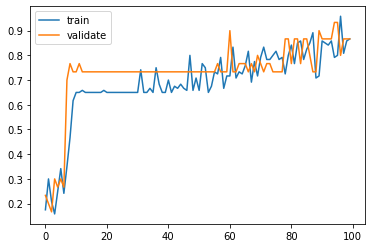

In [55]:
plt.plot(history.history['accuracy'], label = 'train')
plt.plot(history.history['val_accuracy'], label = 'validate')
plt.legend()

In [56]:
model.evaluate(tst[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']], 
              to_categorical(tst.label.values))

1/1 [==============================] - 0s 964us/step - loss: 0.0870 - accuracy: 0.8667


[0.08699612319469452, 0.8666666746139526]

In [57]:
model.predict(tst[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']])

array([[0.9192102 , 0.20068589, 0.01136521],
       [0.10238183, 0.34694028, 0.30366588],
       [0.8295711 , 0.25923413, 0.02819452],
       [0.84725446, 0.2469148 , 0.02741903],
       [0.07006738, 0.36469078, 0.3865474 ],
       [0.04485497, 0.36146423, 0.45784426],
       [0.07533869, 0.34038454, 0.32966274],
       [0.03472251, 0.38330618, 0.55751884],
       [0.8955145 , 0.22562572, 0.01700485],
       [0.00698373, 0.4033882 , 0.75961125],
       [0.8913475 , 0.208691  , 0.01287118],
       [0.01788279, 0.43232334, 0.6833035 ],
       [0.01397181, 0.4246086 , 0.7531921 ],
       [0.89519525, 0.2270473 , 0.01585782],
       [0.8341248 , 0.24502796, 0.02637771],
       [0.07098436, 0.3706005 , 0.3927334 ],
       [0.02761331, 0.39097604, 0.6098448 ],
       [0.09785199, 0.36250523, 0.35627794],
       [0.08292598, 0.3391795 , 0.30769643],
       [0.0261952 , 0.40961465, 0.6433095 ],
       [0.9166814 , 0.20383981, 0.0120233 ],
       [0.79309666, 0.26873177, 0.03050616],
       [0.

In [59]:
# get the predicted labels. 
np.apply_along_axis(np.argmax, 1, model.predict(tst[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]))

array([0, 1, 0, 0, 2, 2, 1, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 1, 1, 2, 0, 0,
       2, 0, 0, 2, 0, 0, 2, 0], dtype=int64)

In [60]:
# true labels. 
tst.label.values

array([0, 1, 0, 0, 1, 1, 1, 2, 0, 2, 0, 2, 2, 0, 0, 1, 2, 1, 1, 2, 0, 0,
       2, 0, 0, 2, 0, 0, 1, 0], dtype=int64)

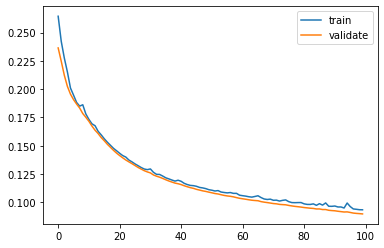

In [17]:
plt.plot(history.history['loss'], label = 'train')
plt.plot(history.history['val_loss'], label = 'validate')
plt.legend()

### ANNs for streamflow prediction

In [61]:
# streamflow ann. 
q_df = pd.read_csv('./streamflow.csv')
q_df['Date'] = pd.to_datetime(q_df['Date'])
q_df = q_df.set_index('Date')
trn, tst = split_train_test(.6, q_df, False)  # we'll use 60% of data for training and testing on the remaining 40%. 

In [62]:
trn

,PRECIPmm,TMP_MNdgC,TMP_MXdgC,WINDM/s,RHmd,SOLARMJ/m2,Q
Date,,,,,,,
2005-01-01,0.000,-32.971,-15.310,5.186,0.601,8.335494,0.106442
2005-01-02,0.000,-26.506,-17.031,5.845,0.719,7.765441,0.106844
2005-01-03,0.000,-28.352,-15.616,2.789,0.572,7.445000,0.106844
2005-01-04,19.697,-27.826,-19.333,4.277,0.990,3.424597,0.106602
2005-01-05,0.000,-24.260,-15.354,4.618,0.697,7.729691,0.105959
...,...,...,...,...,...,...,...
2010-12-27,0.000,-3.833,7.859,5.175,0.733,6.136403,5.475638
2010-12-28,0.000,-5.968,5.470,7.249,0.711,7.050172,2.199581
2010-12-29,0.000,-4.593,5.630,4.560,0.582,4.879975,2.848361


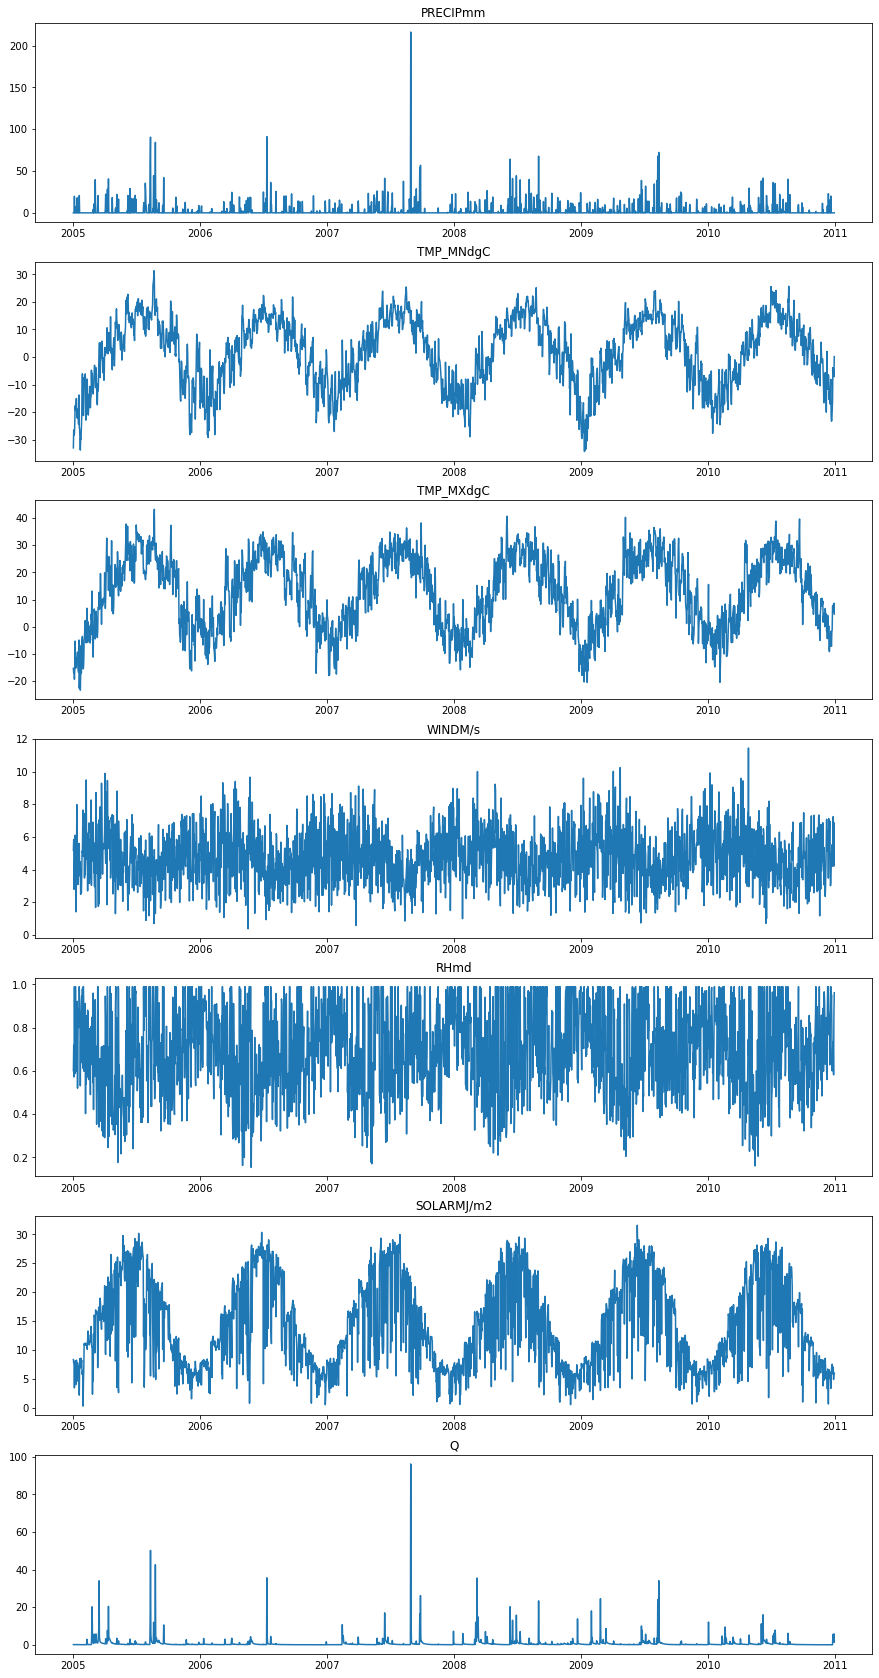

In [63]:
plt.figure(figsize = (15, 30))
for i in range(7):
    plt.subplot(7, 1, i+1)
    plt.plot(trn[[trn.columns[i]]])
    plt.title(trn.columns[i])

Notice that the scales of each input data dimension is different. This scaling issue will later cause problems during the optimization. We did not need to concern about it in the iris dataset since those 4 attributes are in a similar range. We need to normalize the data to avoid scaling issues in the data. 

In [66]:
# artificial neural network. 
model = Sequential()
model.add(Dense(32, input_dim = 6, activation = 'relu'))
model.add(Dense(32, activation = 'relu'))
model.add(Dense(1))

opt = SGD(learning_rate=.01)
# compile the model
model.compile(loss='mean_squared_error', optimizer = opt)

# fit model
trn_mean = trn.mean().copy()
trn_std = trn.std().copy()

tst_mean = tst.mean().copy()
tst_std = tst.std().copy()
trn = (trn - tst_mean)/tst_std
tst = (tst - tst_mean)/tst_std


history = model.fit(trn[['PRECIPmm', 'TMP_MNdgC', 'TMP_MXdgC', 'WINDM/s', 'RHmd', 'SOLARMJ/m2']].values, 
                   trn.Q.values, 
                    validation_data = (
                        tst[['PRECIPmm', 'TMP_MNdgC', 'TMP_MXdgC', 'WINDM/s', 'RHmd', 'SOLARMJ/m2']].values, 
                        tst.Q.values
                    ),
                   epochs=250,
                   batch_size = 60)

Epoch 1/250
37/37 [==============================] - 0s 5ms/step - loss: 1.8951 - val_loss: 0.8799
Epoch 2/250
37/37 [==============================] - 0s 2ms/step - loss: 1.2100 - val_loss: 0.6882
Epoch 3/250
37/37 [==============================] - 0s 3ms/step - loss: 1.1589 - val_loss: 0.7262
Epoch 4/250
37/37 [==============================] - 0s 3ms/step - loss: 1.0306 - val_loss: 0.9335
Epoch 5/250
37/37 [==============================] - 0s 3ms/step - loss: 0.9867 - val_loss: 0.7315
Epoch 6/250
37/37 [==============================] - 0s 3ms/step - loss: 0.9573 - val_loss: 0.7603
Epoch 7/250
37/37 [==============================] - 0s 5ms/step - loss: 0.9382 - val_loss: 0.6912
Epoch 8/250
37/37 [==============================] - 0s 3ms/step - loss: 0.9129 - val_loss: 0.7610
Epoch 9/250
37/37 [==============================] - 0s 4ms/step - loss: 0.9159 - val_loss: 0.6233
Epoch 10/250
37/37 [==============================] - 0s 4ms/step - loss: 0.9180 - val_loss: 0.6605
Epoch 11/

37/37 [==============================] - 0s 4ms/step - loss: 0.8277 - val_loss: 0.5845
Epoch 84/250
37/37 [==============================] - 0s 3ms/step - loss: 0.8100 - val_loss: 0.6522
Epoch 85/250
37/37 [==============================] - 0s 3ms/step - loss: 0.8385 - val_loss: 0.5781
Epoch 86/250
37/37 [==============================] - 0s 3ms/step - loss: 0.8101 - val_loss: 0.5939
Epoch 87/250
37/37 [==============================] - 0s 3ms/step - loss: 0.8211 - val_loss: 0.6260
Epoch 88/250
37/37 [==============================] - 0s 3ms/step - loss: 0.8240 - val_loss: 0.6596
Epoch 89/250
37/37 [==============================] - 0s 3ms/step - loss: 0.8064 - val_loss: 0.6453
Epoch 90/250
37/37 [==============================] - 0s 3ms/step - loss: 0.8103 - val_loss: 0.5794
Epoch 91/250
37/37 [==============================] - 0s 3ms/step - loss: 0.7861 - val_loss: 0.8095
Epoch 92/250
37/37 [==============================] - 0s 3ms/step - loss: 0.8141 - val_loss: 0.5828
Epoch 93/250


37/37 [==============================] - 0s 4ms/step - loss: 0.7539 - val_loss: 0.7619
Epoch 165/250
37/37 [==============================] - 0s 4ms/step - loss: 0.7871 - val_loss: 0.5852
Epoch 166/250
37/37 [==============================] - 0s 3ms/step - loss: 0.7952 - val_loss: 0.5915
Epoch 167/250
37/37 [==============================] - 0s 3ms/step - loss: 0.7720 - val_loss: 0.5879
Epoch 168/250
37/37 [==============================] - 0s 3ms/step - loss: 0.7604 - val_loss: 0.5980
Epoch 169/250
37/37 [==============================] - 0s 3ms/step - loss: 0.7644 - val_loss: 0.6068
Epoch 170/250
37/37 [==============================] - 0s 3ms/step - loss: 0.7496 - val_loss: 0.6123
Epoch 171/250
37/37 [==============================] - 0s 3ms/step - loss: 0.7558 - val_loss: 0.5996
Epoch 172/250
37/37 [==============================] - 0s 3ms/step - loss: 0.7580 - val_loss: 0.6232
Epoch 173/250
37/37 [==============================] - 0s 3ms/step - loss: 0.7603 - val_loss: 0.6509
Epoc

37/37 [==============================] - 0s 3ms/step - loss: 0.7080 - val_loss: 0.6477
Epoch 246/250
37/37 [==============================] - 0s 3ms/step - loss: 0.7233 - val_loss: 0.6303
Epoch 247/250
37/37 [==============================] - 0s 3ms/step - loss: 0.7174 - val_loss: 0.5877
Epoch 248/250
37/37 [==============================] - 0s 3ms/step - loss: 0.7199 - val_loss: 0.5913
Epoch 249/250
37/37 [==============================] - 0s 3ms/step - loss: 0.7251 - val_loss: 0.6302
Epoch 250/250
37/37 [==============================] - 0s 3ms/step - loss: 0.7115 - val_loss: 0.6219


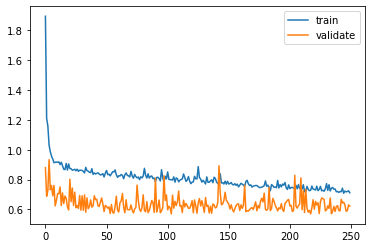

In [67]:
plt.plot(history.history['loss'], label = 'train')
plt.plot(history.history['val_loss'], label = 'validate')
plt.legend()

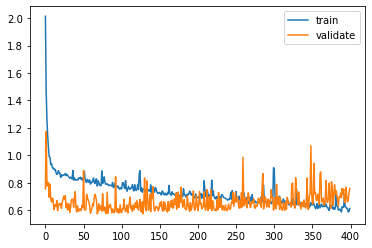

In [65]:
plt.plot(history.history['loss'], label = 'train')
plt.plot(history.history['val_loss'], label = 'validate')
plt.legend()

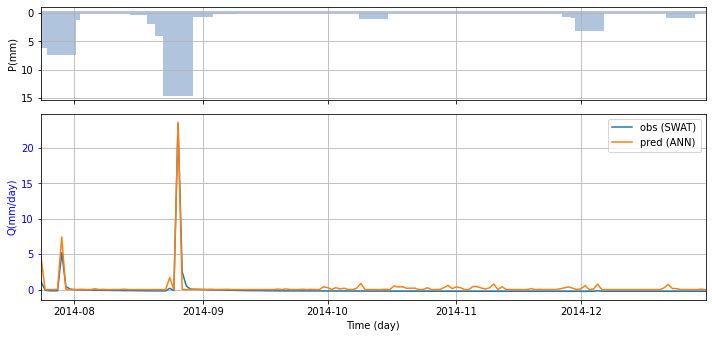

In [68]:
# obtain the model prediction during the testing period. 
pred_x = model.predict(tst[['PRECIPmm', 'TMP_MNdgC', 'TMP_MXdgC', 'WINDM/s', 'RHmd', 'SOLARMJ/m2']].values)
pred_x = pred_x * tst_std.Q + tst_mean.Q
pred_x[pred_x <= 0] = 0

result = pd.DataFrame({'simu_q': (tst.Q * tst_std.Q + tst_mean.Q), 
                       'ann_q': pred_x.flatten(), 
                       'Date': list(tst.index), 
                       'prcp': tst.PRECIPmm * tst_std.PRECIPmm + tst_mean.PRECIPmm})

def check_flw_time_series(start: int, end: int):
    t = result.index[start:end]
    sP = result.prcp[start:end]

    #     fig = plt.figure(figsize = (20,10))
    fig = plt.figure(figsize = (10,5))
    gs = gridspec.GridSpec(2, 1, height_ratios=[1, 2])

    # HYDROGRAM CHART
    ax = plt.subplot(gs[1])
    ax.plot(t,result.simu_q[start:end], label = 'obs (SWAT)')
    ax.plot(t,result.ann_q[start:end], label = 'pred (ANN)')
    ax.set_ylabel(u'Q(mm/day)', color='b')
    ax.set_xlabel('Time (day)')
    ax.tick_params(axis='y', colors='b')
    ax.xaxis.grid(b=True, which='major', color='.7', linestyle='-')
    ax.yaxis.grid(b=True, which='major', color='.7', linestyle='-')
    ax.set_xlim(min(t), max(t))    
    #     ax.set_ylim(0, np.max(list(plot_df.qsim.iloc[0:600]) + list(plot_df.to_bs.iloc[0:600]))*1.2)

    # PRECIPITATION/HYETOGRAPH CHART
    ax2 = plt.subplot(gs[0])
    ax2.bar(t, sP, 7, color='#b0c4de')
    ax2.xaxis.grid(b=True, which='major', color='.7', linestyle='-')
    ax2.yaxis.grid(b=True, which='major', color='0.7', linestyle='-')
    ax2.set_ylabel('P(mm)')
    ax2.set_xlim(min(t), max(t))
    plt.setp(ax2.get_xticklabels(), visible=False)

    plt.tight_layout()
    ax2.invert_yaxis()
    plt.gcf().subplots_adjust(bottom=0.15)
    ax.legend()

check_flw_time_series(1300, 1500)

In [24]:
model.evaluate(tst[['PRECIPmm', 'TMP_MNdgC', 'TMP_MXdgC', 'WINDM/s', 'RHmd', 'SOLARMJ/m2']], 
              tst.Q)

46/46 [==============================] - 0s 596us/step - loss: 0.6616


0.661626398563385

In [25]:
model.evaluate(trn[['PRECIPmm', 'TMP_MNdgC', 'TMP_MXdgC', 'WINDM/s', 'RHmd', 'SOLARMJ/m2']], 
              trn.Q)

69/69 [==============================] - 0s 655us/step - loss: 0.7073


0.7073270678520203